# Project description

This project corresponds to the development of a machine learning model for the prediction of credit scores, produced as the final assignment for the Machine Learning course at Nova SBE during the sprong semester of 2025.

Collaborators of this project are:
- Luis Silva (43055)
- Martin Hunger (65604)
- Mikel Irizar (63619)

# EDA

In [81]:
import pandas as pd

# Had to "pip install openpyxl"

dataset = pd.read_excel("pr11_credit_scores.xlsx")


In [82]:
dataset.info()

# The fact that we have some variables as objects, when they should be strings or numbers, points us to the fact that there are sveral data types mixed together (which should not happen) and alter us to data cleaning.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       99909 non-null   object 
 5   SSN                       99909 non-null   object 
 6   Occupation                99909 non-null   object 
 7   Annual_Income             99909 non-null   object 
 8   Monthly_Inhand_Salary     84920 non-null   float64
 9   Num_Bank_Accounts         99909 non-null   float64
 10  Num_Credit_Card           99909 non-null   float64
 11  Interest_Rate             99909 non-null   float64
 12  Num_of_Loan               99909 non-null   object 
 13  Type_of_Loan              88509 non-null   ob

In [83]:
dataset.describe(include="all")

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,99909.0,99909,99909,99909,84920.000000,99909.000000,99909.000000,99909.000000,99909.0,88509,100000.000000,92998.0,100000,98035.000000,100000,100000,100000.000000,90970,100000,100000.000000,95521,100000,98800,100000
unique,100000,12500,44,10139,1799.0,12501,31,18936,NaN,NaN,NaN,NaN,434.0,6260,NaN,762.0,4384,NaN,4,13178,NaN,404,3,NaN,91049,13,98792,3
top,0x1602,CUS_0xd40,August,Langep,38.0,#F%$D@*&8,_______,17273.83,NaN,NaN,NaN,NaN,3.0,Not Specified,NaN,19.0,_,NaN,Standard,1360.45,NaN,15 Years and 11 Months,Yes,NaN,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12384,44,2831.0,5565,7055,16,NaN,NaN,NaN,NaN,14368.0,1406,NaN,5327.0,2091,NaN,36479,24,NaN,446,52326,NaN,4305,25487,9,53174
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4194.071131,17.104395,22.495621,72.469027,NaN,NaN,21.068780,NaN,NaN,27.754251,NaN,NaN,32.285173,NaN,NaN,1403.118217,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3183.605038,117.454091,129.115463,466.383442,NaN,NaN,14.860104,NaN,NaN,193.177339,NaN,NaN,5.116875,NaN,NaN,8306.041270,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.645417,-1.000000,0.000000,1.000000,NaN,NaN,-5.000000,NaN,NaN,0.000000,NaN,NaN,20.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1625.597917,3.000000,4.000000,8.000000,NaN,NaN,10.000000,NaN,NaN,3.000000,NaN,NaN,28.052567,NaN,NaN,30.306660,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093.745000,6.000000,5.000000,13.000000,NaN,NaN,18.000000,NaN,NaN,6.000000,NaN,NaN,32.305784,NaN,NaN,69.249473,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5957.448333,7.000000,7.000000,20.000000,NaN,NaN,28.000000,NaN,NaN,9.000000,NaN,NaN,36.496663,NaN,NaN,161.224249,NaN,NaN,NaN,NaN


In [84]:
pd.set_option('display.max_columns', None)
dataset.head(32)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2.0,4.0,6.0,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [85]:
# Evaluate the count of unique values in each of the columns

unique_values_per_column = []

for column in dataset.columns:
    entry = {
        "Column": column,
        "Unique Values": dataset[column].nunique()}
    unique_values_per_column.append(entry)

unique_values_per_column = pd.DataFrame(unique_values_per_column)
print(unique_values_per_column)

                      Column  Unique Values
0                         ID         100000
1                Customer_ID          12500
2                      Month             44
3                       Name          10139
4                        Age           1799
5                        SSN          12501
6                 Occupation             31
7              Annual_Income          18936
8      Monthly_Inhand_Salary          13235
9          Num_Bank_Accounts            946
10           Num_Credit_Card           1180
11             Interest_Rate           1750
12               Num_of_Loan            434
13              Type_of_Loan           6260
14       Delay_from_due_date             73
15    Num_of_Delayed_Payment            762
16      Changed_Credit_Limit           4384
17      Num_Credit_Inquiries           1223
18                Credit_Mix              4
19          Outstanding_Debt          13178
20  Credit_Utilization_Ratio         100000
21        Credit_History_Age    

In [86]:
# Evaluate the count of unique values in each of the columns

mean_unique_values_per_customer = []

for column in dataset.columns:
    if column != "Customer_ID":
        entry = {
            "Column": column,
            "Unique Values": dataset.groupby("Customer_ID")[column].nunique().mean()}
        mean_unique_values_per_customer.append(entry)

mean_unique_values_per_customer = pd.DataFrame(mean_unique_values_per_customer)
print(mean_unique_values_per_customer)

                      Column  Unique Values
0                         ID        8.00000
1                      Month        8.00000
2                       Name        1.00000
3                        Age        2.13088
4                        SSN        1.36872
5                 Occupation        1.51464
6              Annual_Income        1.51608
7      Monthly_Inhand_Salary        1.05968
8          Num_Bank_Accounts        1.13056
9            Num_Credit_Card        1.20720
10             Interest_Rate        1.16264
11               Num_of_Loan        1.63288
12              Type_of_Loan        0.88592
13       Delay_from_due_date        2.98736
14    Num_of_Delayed_Payment        3.33824
15      Changed_Credit_Limit        2.56536
16      Num_Credit_Inquiries        1.69848
17                Credit_Mix        1.83816
18          Outstanding_Debt        1.07848
19  Credit_Utilization_Ratio        8.00000
20        Credit_History_Age        7.27760
21     Payment_of_Min_Amount    

In [87]:
# For those values that are very near to a round number, but not quite there (1.05 instead of 1), can the problem be solved by substituting the missing values? If not, we know that the value might take more than two numbers and we would have to dig deeper for data cleaning.


mean_unique_values_per_customer = []

for column in dataset.columns:
    if column != "Customer_ID":
        # Identify customers with NO missing values in the column
        no_missing_customers = (
            dataset[["Customer_ID", column]]
            .groupby("Customer_ID")
            .filter(lambda x: x[column].isnull().sum() == 0)
        )

        # Calculate mean number of unique values per customer for this column
        entry = {
            "Column": column,
            "Unique Values": no_missing_customers.groupby("Customer_ID")[column].nunique().mean()
        }

        mean_unique_values_per_customer.append(entry)

mean_unique_values_per_customer = pd.DataFrame(mean_unique_values_per_customer)
print(mean_unique_values_per_customer)


                      Column  Unique Values
0                         ID       8.000000
1                      Month       8.000000
2                       Name       1.000000
3                        Age       2.131679
4                        SSN       1.368442
5                 Occupation       1.515029
6              Annual_Income       1.515996
7      Monthly_Inhand_Salary       1.063167
8          Num_Bank_Accounts       1.130389
9            Num_Credit_Card       1.207172
10             Interest_Rate       1.162302
11               Num_of_Loan       1.633411
12              Type_of_Loan       1.000000
13       Delay_from_due_date       2.987360
14    Num_of_Delayed_Payment       3.480171
15      Changed_Credit_Limit       2.565360
16      Num_Credit_Inquiries       1.708142
17                Credit_Mix       1.838160
18          Outstanding_Debt       1.078480
19  Credit_Utilization_Ratio       8.000000
20        Credit_History_Age       8.000000
21     Payment_of_Min_Amount    

In [88]:
# Initial data cleaning

# We noticed that there is a bunch of trailing underscores that should not be in the data. The data might actually have some interpretation, but the trailing underscores is messing it.

variables_allow_underscore = ["Customer_ID", "Payment_Behaviour"]
string_variables = ["ID", "Month", "Customer_ID", "Name", "SSN", "Occupation", "Type_of_Loan", "Credit_Mix", "Credit_History_Age", "Payment_of_Min_Amount", "Payment_Behaviour", "Credit_Score"]
numerical_variables = ["Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate", "Num_of_Loan", "Delay_from_due_date", "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Num_Credit_Inquiries", "Outstanding_Debt", "Credit_Utilization_Ratio", "Total_EMI_per_month", "Amount_invested_monthly", "Monthly_Balance"]

for column in dataset.columns:
    if column not in variables_allow_underscore:
        dataset[column] = dataset[column].astype(str).str.replace("_", "", regex=False)
    if column in numerical_variables:
        dataset[column] = pd.to_numeric(dataset[column], errors='coerce').round(2)
    elif column in string_variables:
        dataset[column] = dataset[column].astype(str).str.lower()
    else:
        print(f'Column {column} is neither numerical or string')

In [89]:
unique_values_per_column = []

for column in dataset.columns:
    entry = {
        "Column": column,
        "Unique Values": dataset[column].nunique(),
        "Data Type" : dataset[column].dtype}
    unique_values_per_column.append(entry)

unique_values_per_column = pd.DataFrame(unique_values_per_column)
print(unique_values_per_column)

                      Column  Unique Values Data Type
0                         ID         100000    object
1                Customer_ID          12500    object
2                      Month             36    object
3                       Name          10140    object
4                        Age           1739   float64
5                        SSN          12502    object
6                 Occupation             17    object
7              Annual_Income          13482   float64
8      Monthly_Inhand_Salary          13124   float64
9          Num_Bank_Accounts            946   float64
10           Num_Credit_Card           1180   float64
11             Interest_Rate           1750   float64
12               Num_of_Loan            414   float64
13              Type_of_Loan           6261    object
14       Delay_from_due_date             73     int64
15    Num_of_Delayed_Payment            723   float64
16      Changed_Credit_Limit           3634   float64
17      Num_Credit_Inquiries

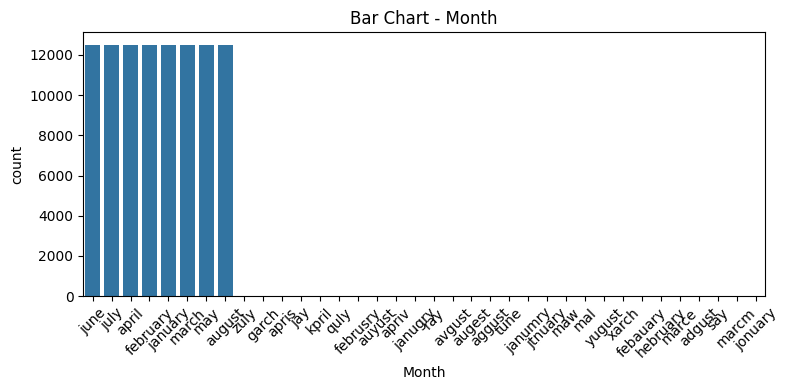

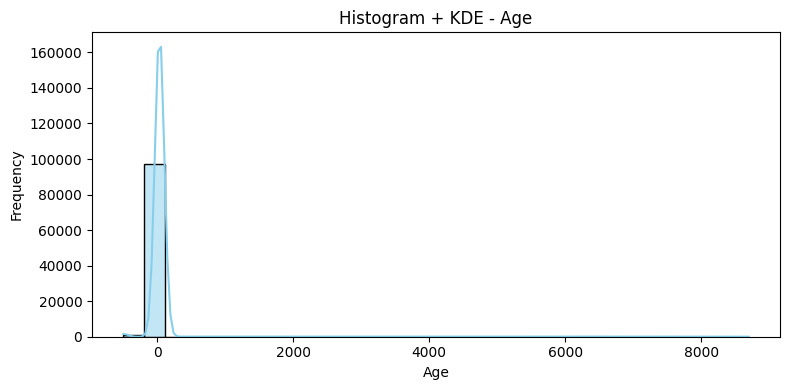

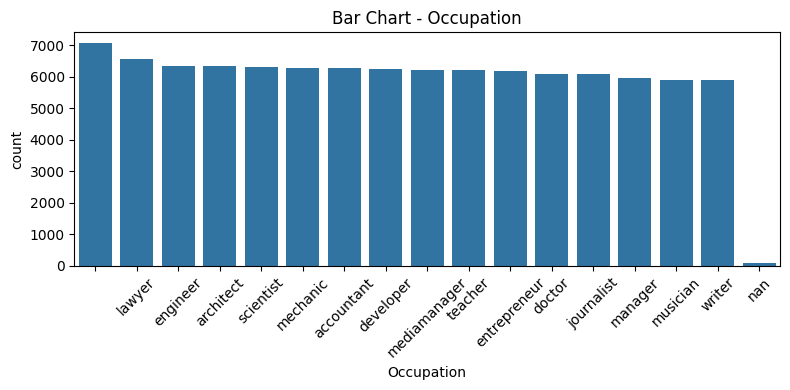

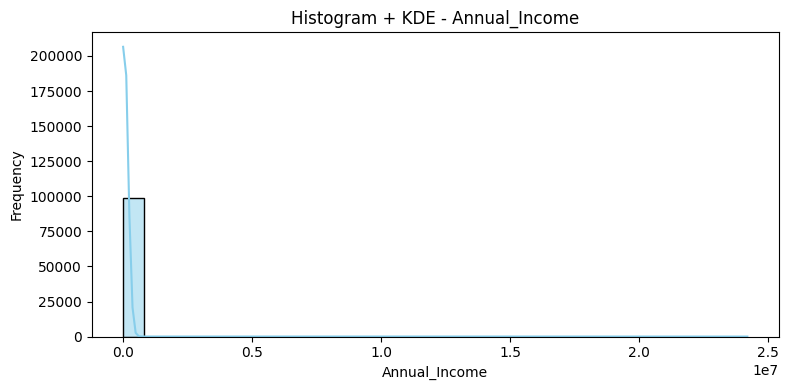

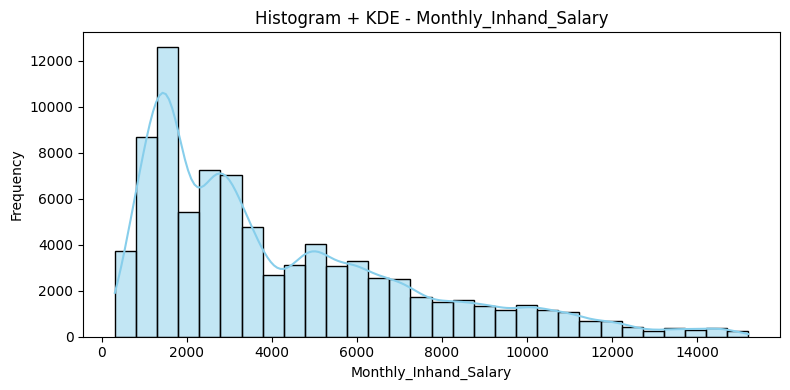

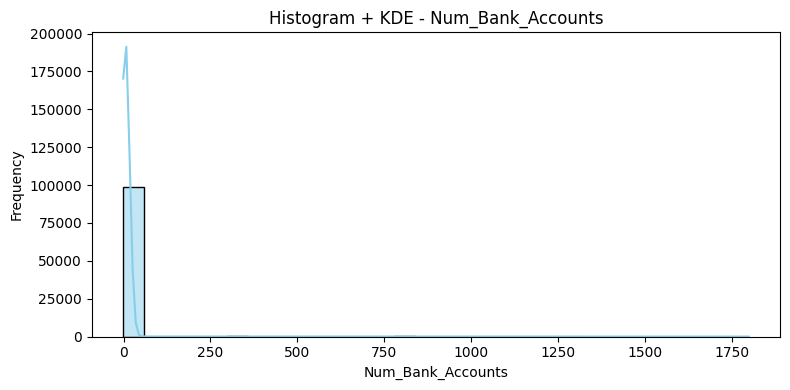

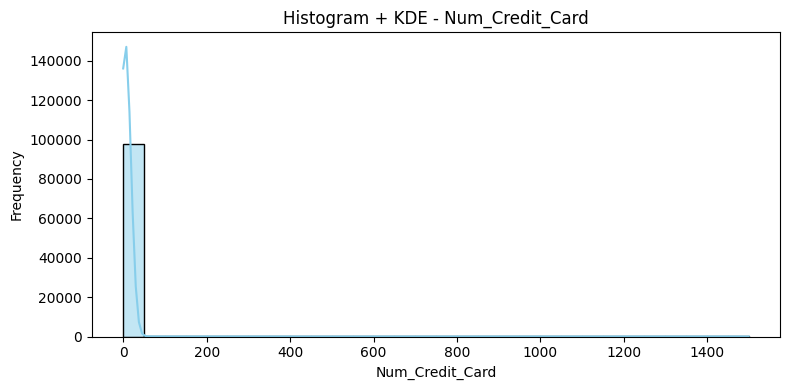

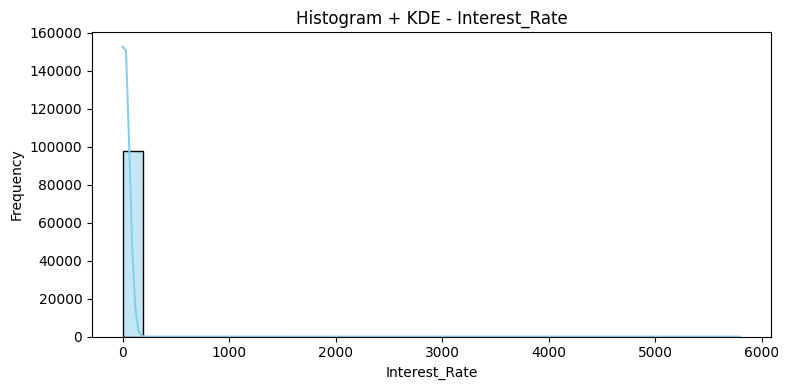

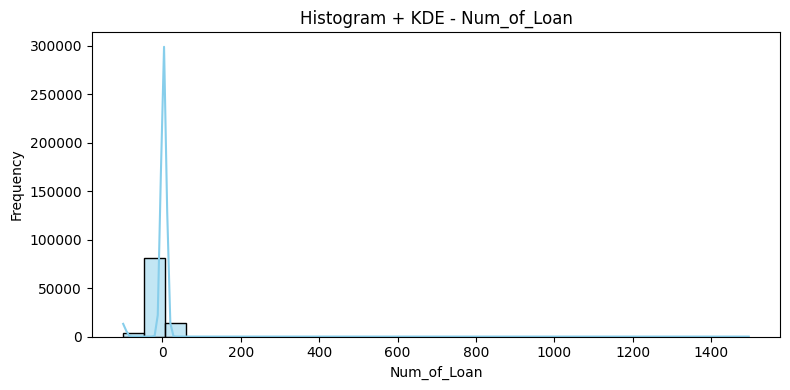

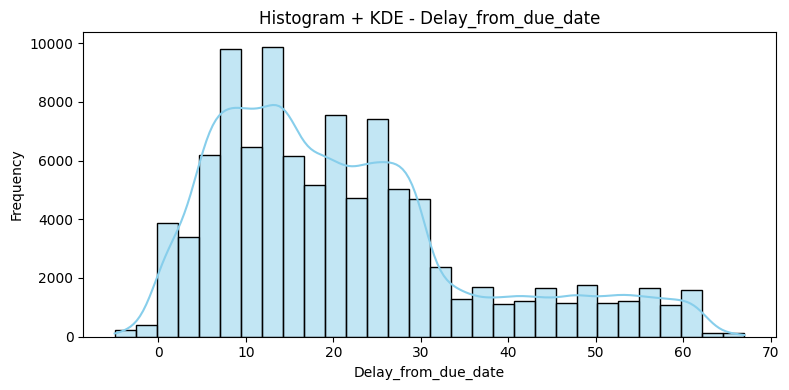

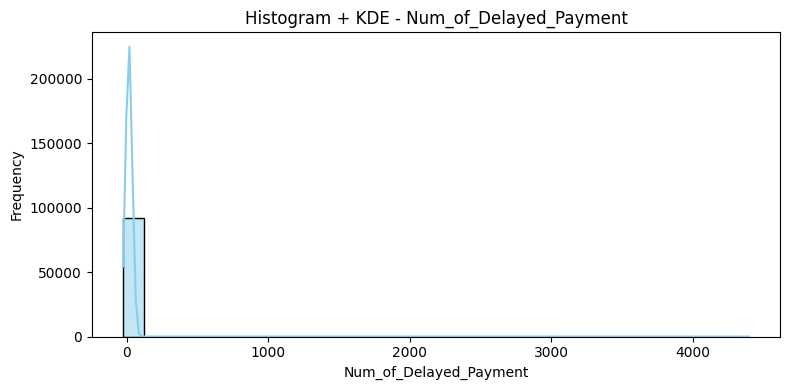

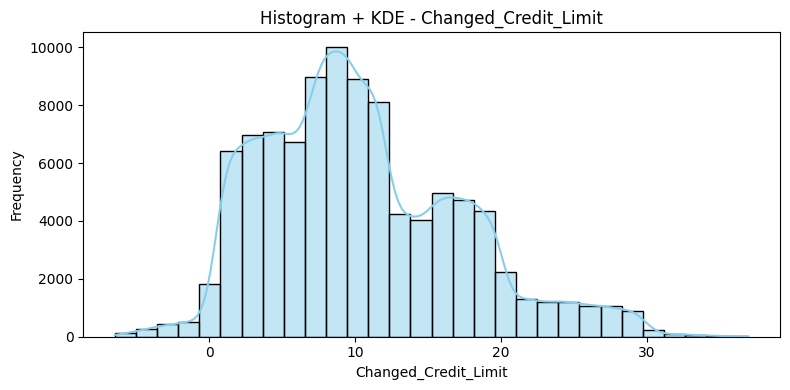

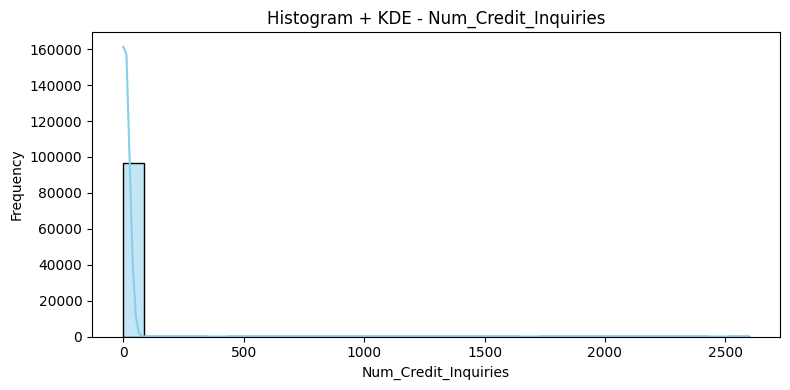

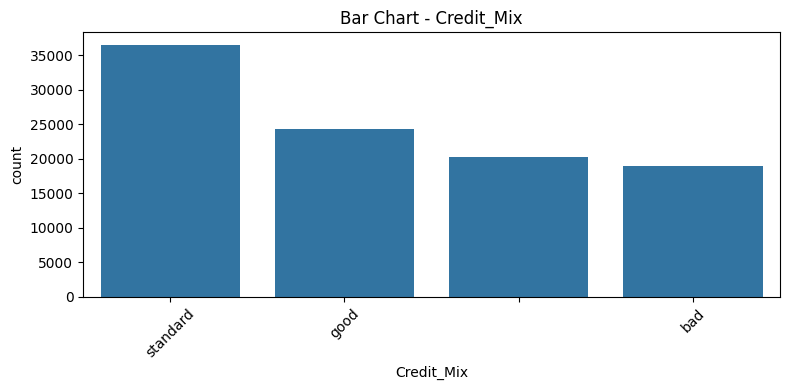

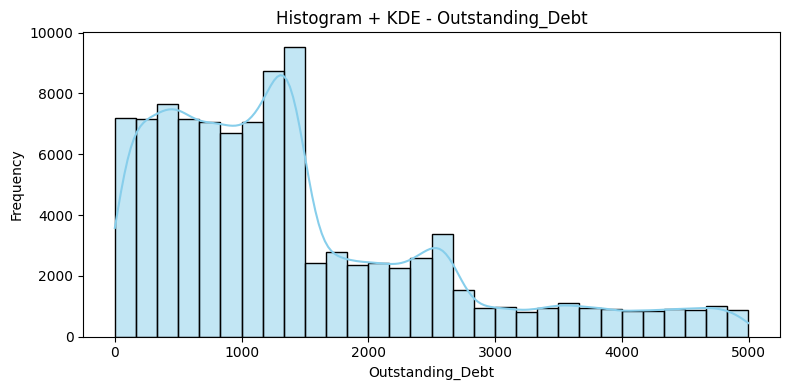

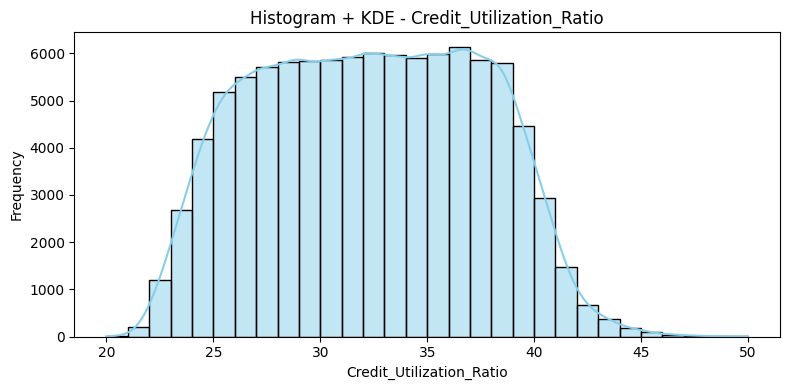

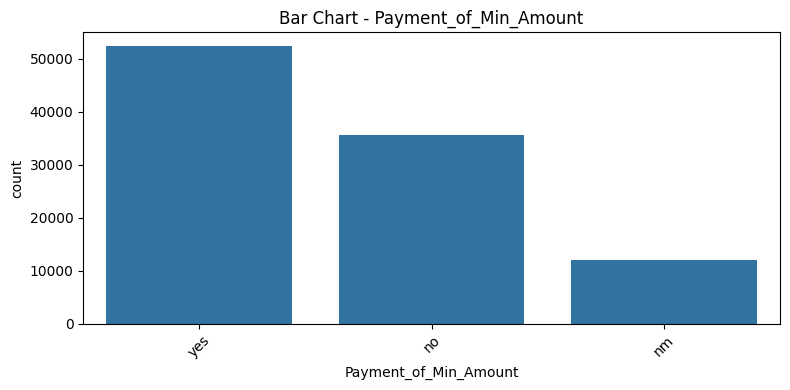

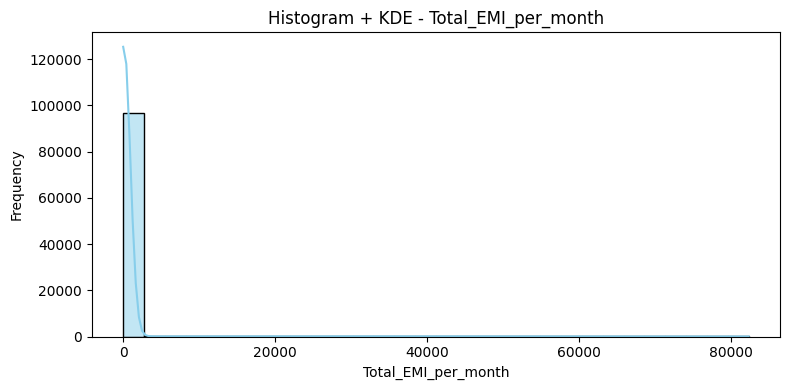

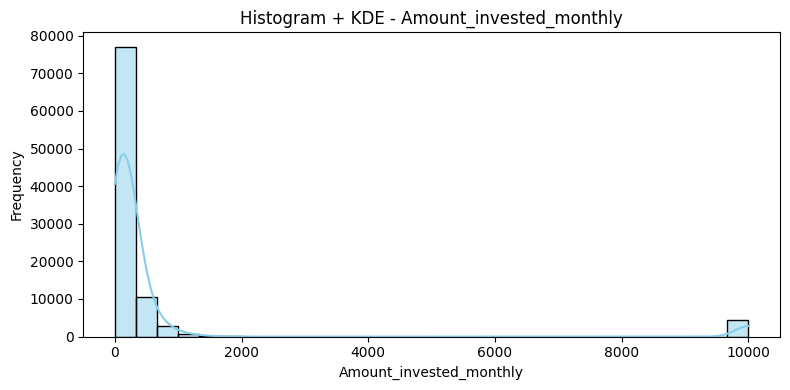

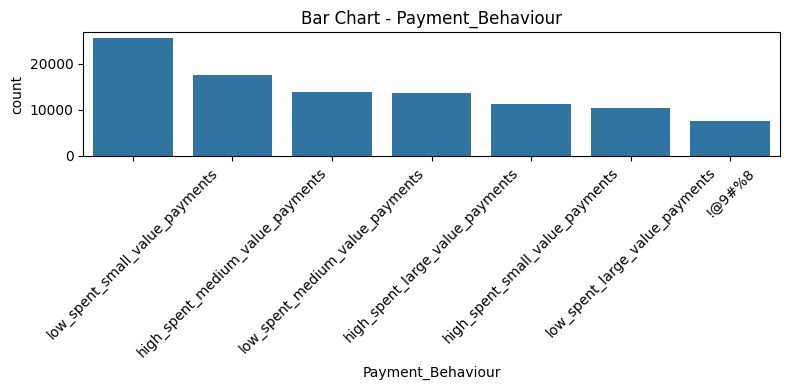

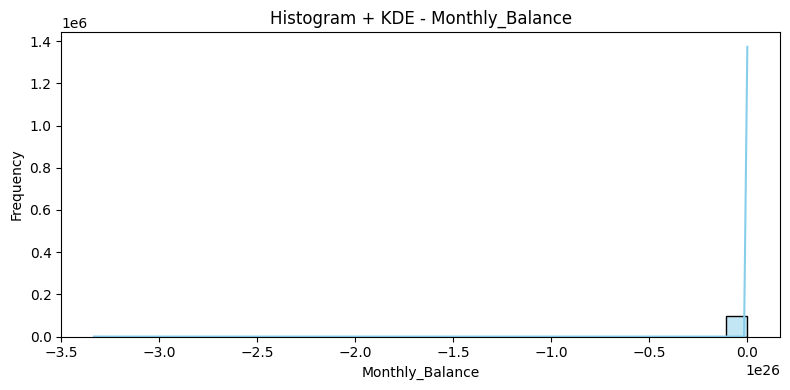

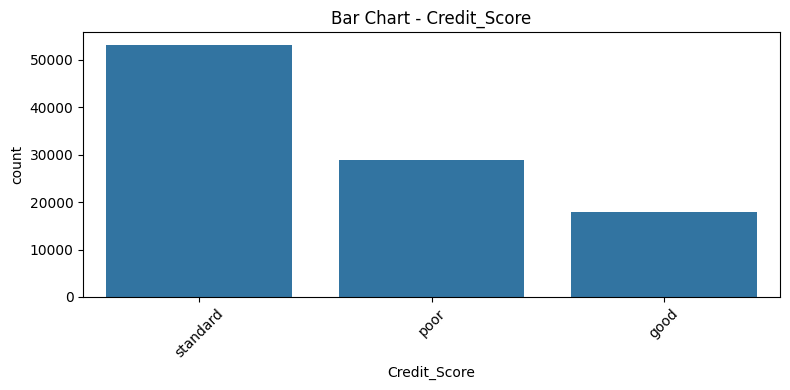

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lists of variable types
string_variables = ["ID", "Month", "Customer_ID", "Name", "SSN", "Occupation", "Type_of_Loan", "Credit_Mix", 
                    "Credit_History_Age", "Payment_of_Min_Amount", "Payment_Behaviour", "Credit_Score"]

numerical_variables = ["Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card", 
                       "Interest_Rate", "Num_of_Loan", "Delay_from_due_date", "Num_of_Delayed_Payment", 
                       "Changed_Credit_Limit", "Num_Credit_Inquiries", "Outstanding_Debt", "Credit_Utilization_Ratio", 
                       "Total_EMI_per_month", "Amount_invested_monthly", "Monthly_Balance"]

# Loop and plot
for column in dataset.columns:
    if column in string_variables and dataset[column].nunique() < 100:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=dataset, x=column, order=dataset[column].value_counts().index)
        plt.title(f'Bar Chart - {column}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
    elif column in numerical_variables:
        plt.figure(figsize=(4, 6))
        sns.boxplot(data=dataset, y=column)
        plt.title(f'Boxplot - {column}')
        plt.tight_layout()
        plt.show()

# Things to do

- Essential to understand every variable of the dataset
- Check whether the columns are the right type
    - If no, force the correct type.
- After knowing data:
    - Plot and and see summary statistics
    - Check the unique values of each
    - Check if the data make makes sense
        - If not, see the most correct way to deal with it
- Check multicollinearity? How important is it when you would run a more advanced model?
- Check class imbalance in target variable. Is it necessary to do any sort of balancing?
- Would it be good to apply feature enginnering?
- Remove duplicates

In [91]:
dataset.describe(include="all")

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,100000,99909.000000,100000,100000,9.990900e+04,84920.000000,99909.000000,99909.000000,99909.000000,99909.000000,100000,100000.000000,92998.000000,97909.000000,98035.000000,100000,100000.000000,100000.000000,100000,100000,100000.000000,95521.000000,100000,9.880000e+04,100000
unique,100000,12500,36,10140,NaN,12502,17,NaN,NaN,NaN,NaN,NaN,NaN,6261,NaN,NaN,NaN,NaN,4,NaN,NaN,405,3,NaN,NaN,7,NaN,3
top,0x1602,cus_0xd40,june,nan,NaN,#f%$d@*&8,,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,standard,NaN,NaN,nan,yes,NaN,NaN,low_spent_small_value_payments,NaN,standard
freq,1,8,12499,9985,NaN,5565,7055,NaN,NaN,NaN,NaN,NaN,NaN,11491,NaN,NaN,NaN,NaN,36479,NaN,NaN,9030,52326,NaN,NaN,25513,NaN,53174
mean,NaN,NaN,NaN,NaN,110.584072,NaN,NaN,1.763423e+05,4194.071104,17.104395,22.495621,72.469027,3.011480,NaN,21.068780,30.917966,10.389025,27.754251,NaN,1426.220376,32.285184,NaN,NaN,1403.118254,637.413012,NaN,-3.036437e+22,NaN
std,NaN,NaN,NaN,NaN,686.084722,NaN,NaN,1.429799e+06,3183.605005,117.454091,129.115463,466.383442,62.674664,NaN,14.860104,226.032627,6.789496,193.177339,NaN,1155.129026,5.116880,NaN,NaN,8306.041264,2043.319326,NaN,3.181295e+24,NaN
min,NaN,NaN,NaN,NaN,-500.000000,NaN,NaN,7.005930e+03,303.650000,-1.000000,0.000000,1.000000,-100.000000,NaN,-5.000000,-27.000000,-6.490000,0.000000,NaN,0.230000,20.000000,NaN,NaN,0.000000,0.000000,NaN,-3.333333e+26,NaN
25%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,1.945750e+04,1625.600000,3.000000,4.000000,8.000000,1.000000,NaN,10.000000,9.000000,5.320000,3.000000,NaN,566.072500,28.050000,NaN,NaN,30.310000,74.530000,NaN,2.700900e+02,NaN
50%,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,3.757861e+04,3093.750000,6.000000,5.000000,13.000000,3.000000,NaN,18.000000,14.000000,9.400000,6.000000,NaN,1166.155000,32.310000,NaN,NaN,69.250000,135.930000,NaN,3.367200e+02,NaN
75%,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,7.279092e+04,5957.450000,7.000000,7.000000,20.000000,5.000000,NaN,28.000000,18.000000,14.870000,9.000000,NaN,1945.962500,36.500000,NaN,NaN,161.220000,265.730000,NaN,4.702225e+02,NaN
